In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
stressData = pd.read_csv("./Samples/StressLevelDataset.csv", encoding = 'euc-kr')

In [2]:
# 결측치 수
stressData.isnull().sum()

불안수준        0
자존감         0
정신과병력       0
우울증         0
두통          0
수면질         0
삶의질         0
학업성취도       0
학업부담도       0
교사-학생관계도    0
진로고민도       0
사회적지원       0
압박감정도       0
과외정도        0
괴롭힘         0
스트레스        0
dtype: int64

In [3]:
# 평균, 중앙값 비교
stressData.describe().loc[['mean', '50%'], :]

,불안수준,자존감,정신과병력,우울증,두통,수면질,삶의질,학업성취도,학업부담도,교사-학생관계도,진로고민도,사회적지원,압박감정도,과외정도,괴롭힘,스트레스
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.66,2.518182,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.50,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000


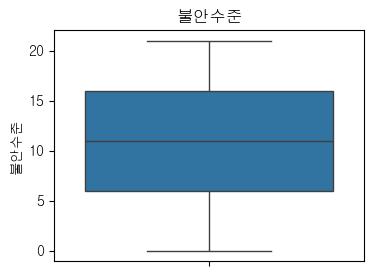

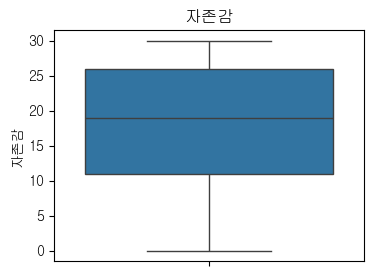

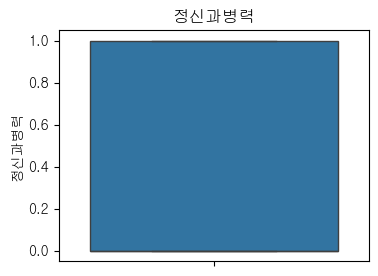

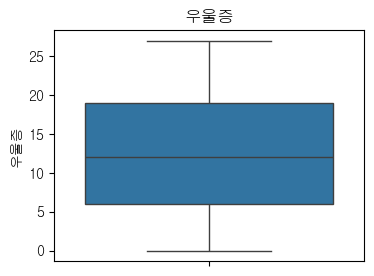

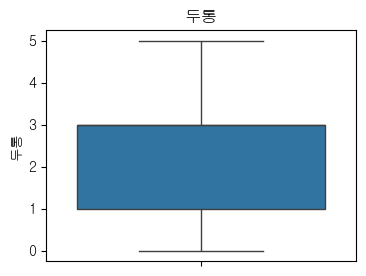

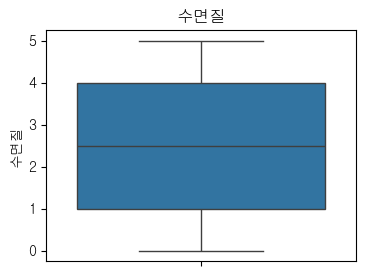

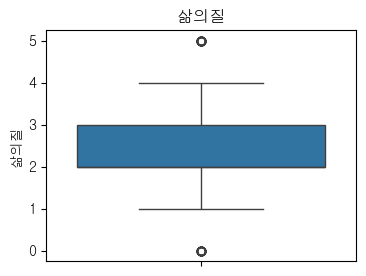

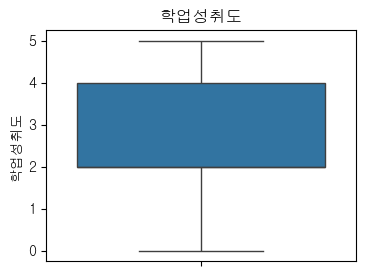

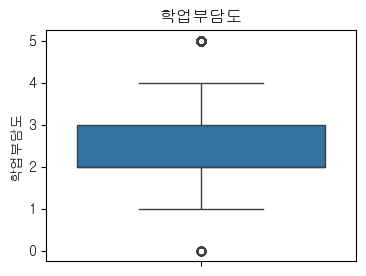

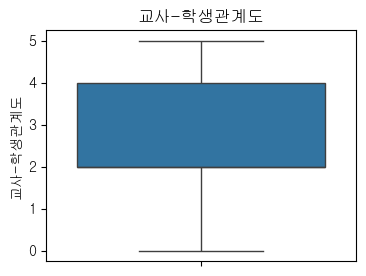

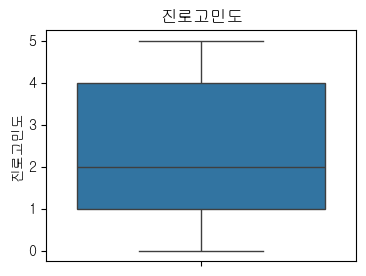

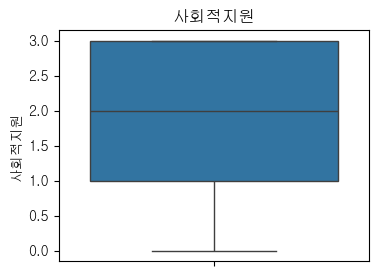

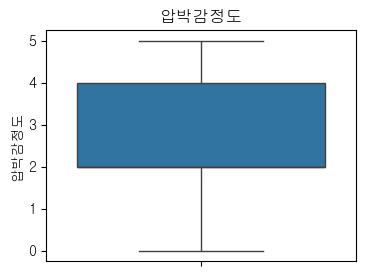

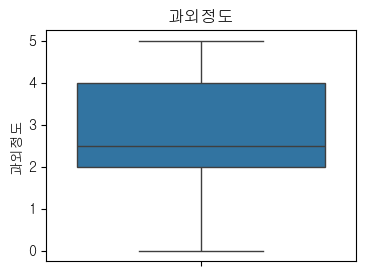

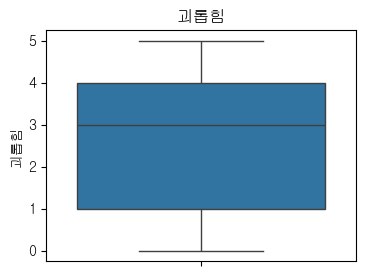

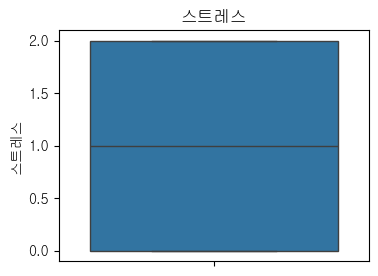

In [23]:
# 이상치 확인
plt.rcParams['font.family'] = 'Gulim'
for col in stressData.columns:
    plt.figure(figsize = (4, 3))
    sns.boxplot(stressData[col])
    plt.title(col)
    plt.show()

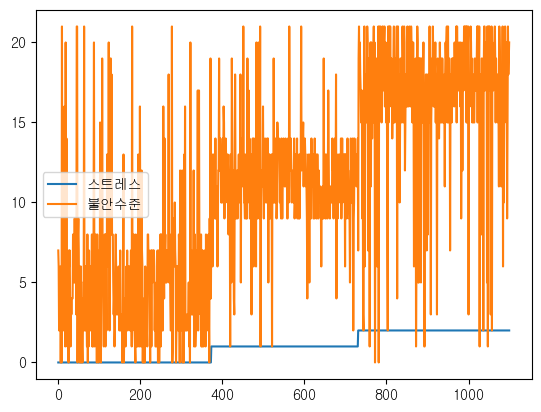

In [5]:
plotData = stressData.sort_values(by = '스트레스')
plt.plot(range(0, len(plotData)), plotData['스트레스'], label = '스트레스')
plt.plot(range(0, len(plotData)), plotData['불안수준'], label = '불안수준')
plt.legend()
plt.show()

In [6]:
# 상관계수
abs(stressData.corr()['스트레스']).sort_values(ascending = False)

스트레스        1.000000
자존감         0.756195
괴롭힘         0.751162
수면질         0.749068
진로고민도       0.742619
불안수준        0.736795
우울증         0.734379
학업성취도       0.720922
두통          0.713484
과외정도        0.692977
압박감정도       0.690684
교사-학생관계도    0.680163
정신과병력       0.648644
학업부담도       0.634156
사회적지원       0.632497
삶의질         0.581723
Name: 스트레스, dtype: float64

# 시나리오
- ChatGPT의 의견
  - 원인
    - 학업부담도
    - 과외정도
    - 진로고민도
    - 압박감정도
    - 괴롭힘
    - 교사-학생관계도
    - 학업성취도
  - 결과
    - 불안수준
    - 우울증
    - 두통
    - 수면질
    - 삶의질
  - 양면적 요인
    - 자존감
    - 정신과병력
    - 사회적지원
- 가능한 시나리오
  - 학생 스트레스의 요인은 크게 두 가지로 나눌 수 있다. 첫 번째로 학업 및 삶에 대한 부담, 두 번째로 사람과의 관계다. 학생에게 과도한 학업과 성취도 압박은 학생으로 하여금 목표없는 과정 수행을 강요받게 하고 자율적인 삶의 선택을 차단하여 수동적인 인간을 만든다. 또한, 교우간의 괴롭힘 혹은 교사와 학생의 나쁜 관계는 사회생활에 대한 불안감, 두려움을 주기 때문에 사회생활에 소극적이거나 인간 및 특정 집단에 대한 혐오가 나타날 수 있다.
  - 이러한 요인은 학생 스트레스에 악영향을 주어 불안감, 우울증, 두통을 유발할 수 있고 수면질이 낮아지고 전반적으로 삶의 질을 낮춘다. 이로인한 자존감 하락과 정신과병력은 또다시 학생 스트레스에 영향을 주게 되고 사회와의 관계도 악화되서 사회적인 지원이 부족해지는 악순환이 만들어질 수 있다.

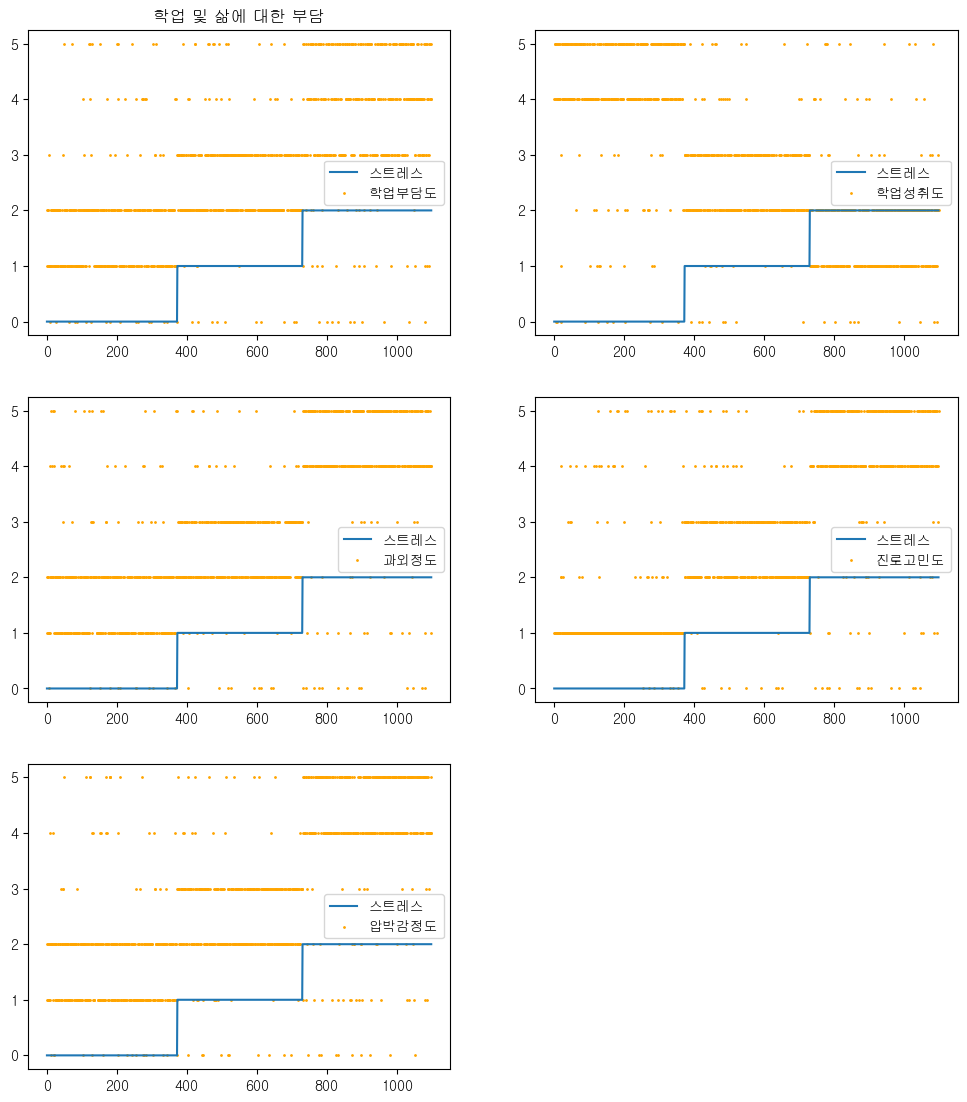

In [7]:
def EdStress(plotData, standard):
    """학업 및 삶에 대한 부담"""
    plotLength = range(0, len(plotData))
    plt.rcParams['font.family'] = 'Gulim'
    plt.figure(figsize = (12,13.5))
    
    plt.subplot(3, 2, 1)
    plt.title("학업 및 삶에 대한 부담")
    plt.plot(plotLength, plotData[standard], label = standard)
    plt.scatter(plotLength, plotData['학업부담도'], label = '학업부담도', s = 1, c = "orange")
    plt.legend()
    
    plt.subplot(3, 2, 2)
    plt.plot(plotLength, plotData[standard], label = standard)
    plt.scatter(plotLength, plotData['학업성취도'], label = '학업성취도', s = 1, c = "orange")
    plt.legend()
    
    plt.subplot(3, 2, 3)
    plt.plot(plotLength, plotData[standard], label = standard)
    plt.scatter(plotLength, plotData['과외정도'], label = '과외정도', s = 1, c = "orange")
    plt.legend()
    
    plt.subplot(3, 2, 4)
    plt.plot(plotLength, plotData[standard], label = standard)
    plt.scatter(plotLength, plotData['진로고민도'], label = '진로고민도', s = 1, c = "orange")
    plt.legend()
    
    plt.subplot(3, 2, 5)
    plt.plot(plotLength, plotData[standard], label = standard)
    plt.scatter(plotLength, plotData['압박감정도'], label = '압박감정도', s = 1, c = "orange")
    plt.legend()
    
    plt.show()

EdStress(plotData, '스트레스')

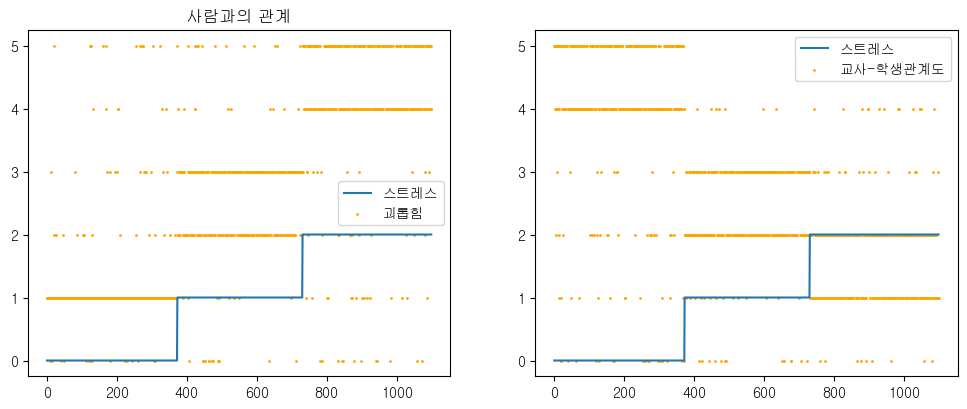

In [8]:
def ReStress(plotData, standard):
    """사람과의 관계"""
    plotLength = range(0, len(plotData))
    plt.rcParams['font.family'] = 'Gulim'
    plt.figure(figsize = (12, 4.5))
    
    plt.subplot(1, 2, 1)
    plt.title("사람과의 관계")
    plt.plot(plotLength, plotData[standard], label = standard)
    plt.scatter(plotLength, plotData['괴롭힘'], label = '괴롭힘', s = 1, c = "orange")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(plotLength, plotData[standard], label = standard)
    plt.scatter(plotLength, plotData['교사-학생관계도'], label = '교사-학생관계도', s = 1, c = "orange")
    plt.legend()
    
    plt.show()

ReStress(plotData, '스트레스')

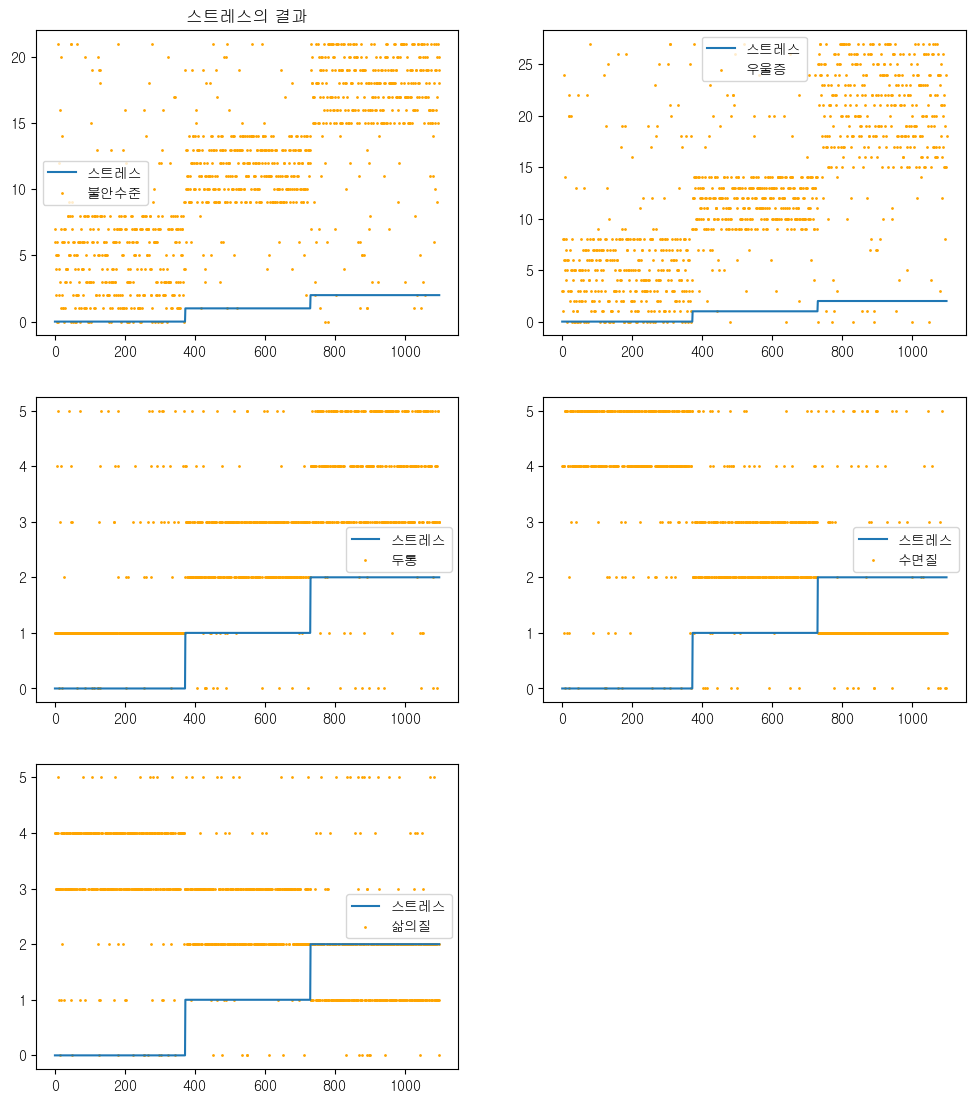

In [9]:
def StressResults(plotData, standard):
    """스트레스의 결과"""
    plotLength = range(0, len(plotData))
    plt.rcParams['font.family'] = 'Gulim'
    plt.figure(figsize = (12,13.5))
    
    plt.subplot(3, 2, 1)
    plt.title("스트레스의 결과")
    plt.plot(plotLength, plotData[standard], label = standard)
    plt.scatter(plotLength, plotData['불안수준'], label = '불안수준', s = 1, c = "orange")
    plt.legend()
    
    plt.subplot(3, 2, 2)
    plt.plot(plotLength, plotData[standard], label = standard)
    plt.scatter(plotLength, plotData['우울증'], label = '우울증', s = 1, c = "orange")
    plt.legend()
    
    plt.subplot(3, 2, 3)
    plt.plot(plotLength, plotData[standard], label = standard)
    plt.scatter(plotLength, plotData['두통'], label = '두통', s = 1, c = "orange")
    plt.legend()
    
    plt.subplot(3, 2, 4)
    plt.plot(plotLength, plotData[standard], label = standard)
    plt.scatter(plotLength, plotData['수면질'], label = '수면질', s = 1, c = "orange")
    plt.legend()
    
    plt.subplot(3, 2, 5)
    plt.plot(plotLength, plotData[standard], label = standard)
    plt.scatter(plotLength, plotData['삶의질'], label = '삶의질', s = 1, c = "orange")
    plt.legend()
    
    plt.show()

StressResults(plotData, '스트레스')

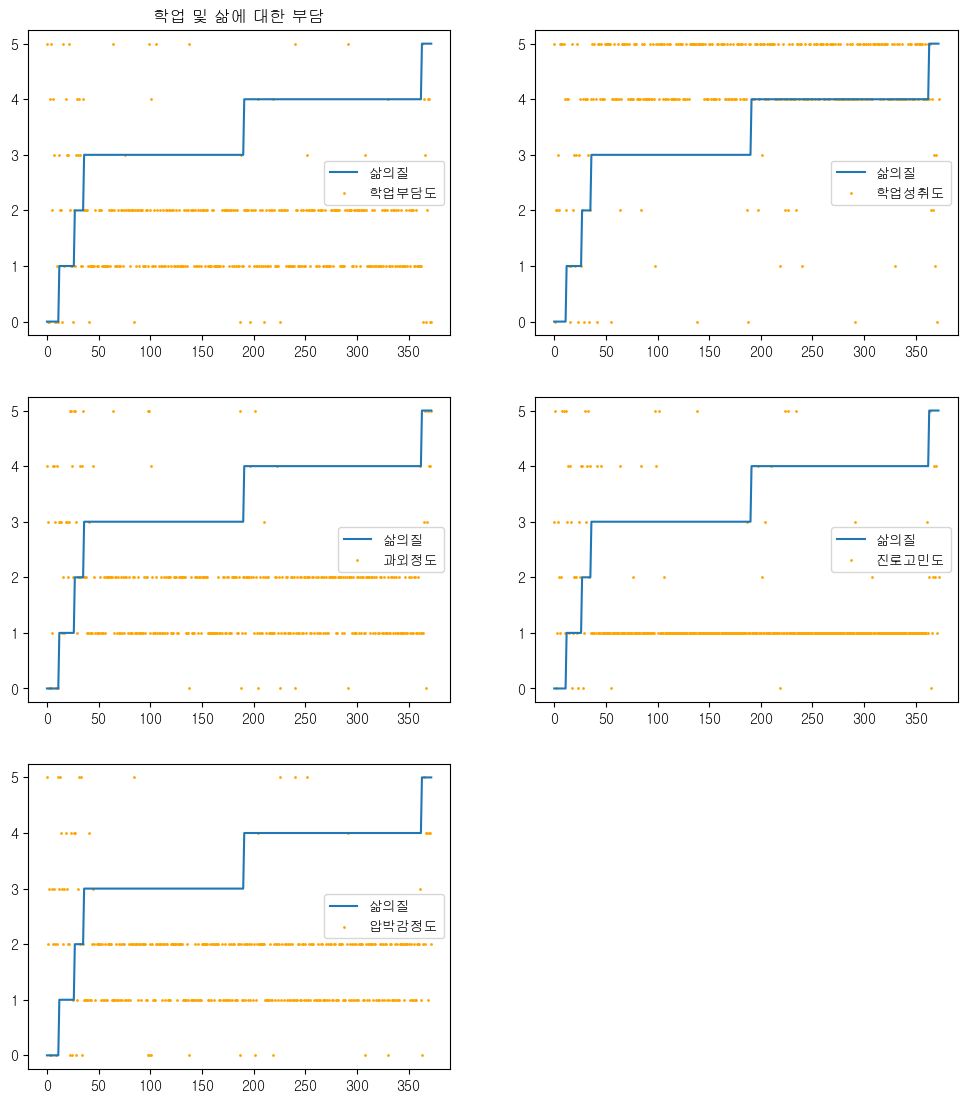

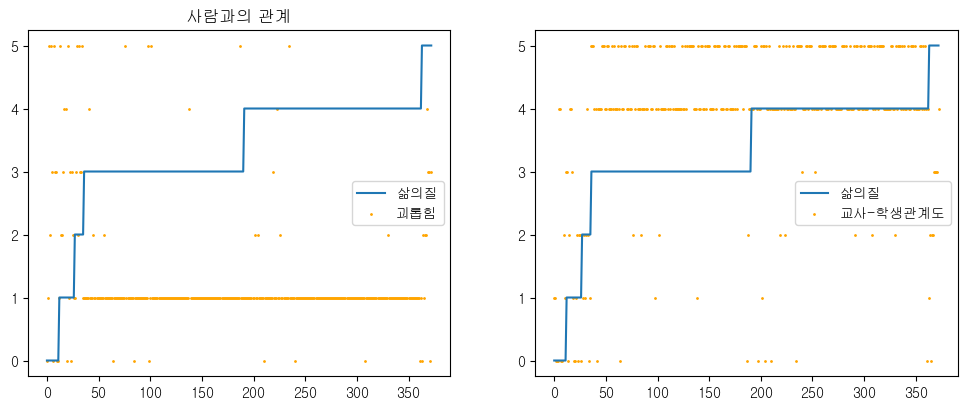

In [10]:
# 스트레스가 낮은 사람
plotData = stressData[1 > stressData['스트레스']].sort_values(by = '삶의질')
EdStress(plotData, '삶의질')
ReStress(plotData, '삶의질')

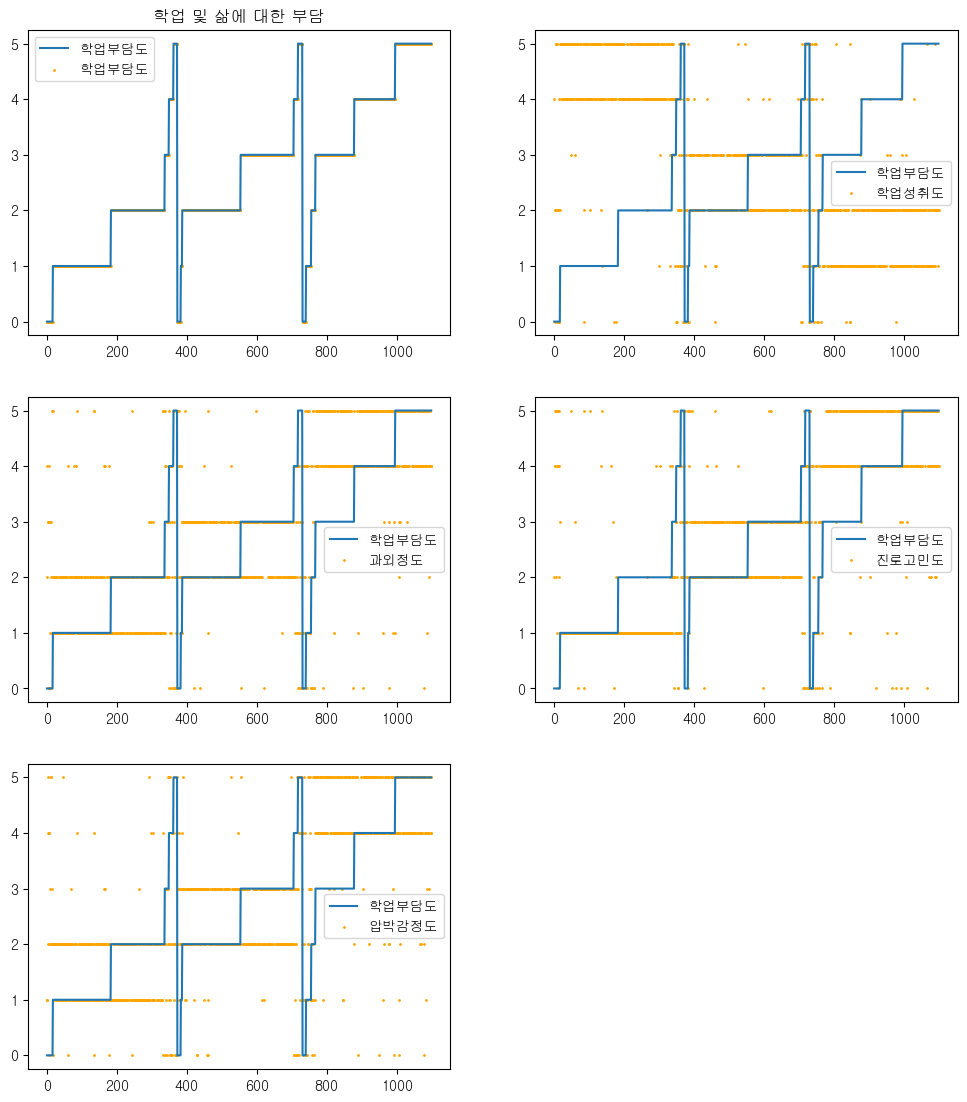

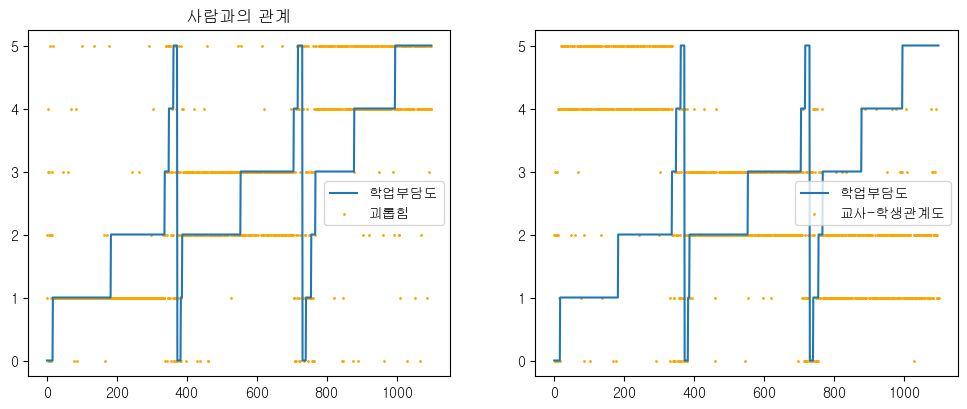

In [11]:
plotData = stressData.sort_values(['스트레스', '학업부담도'])
EdStress(plotData, '학업부담도')
ReStress(plotData, '학업부담도')

In [12]:
# 스트레스가 0인 사람의 데이터 정규화
stress0 = stressData.loc[0 == stressData['스트레스']].mean() / stressData.loc[0 == stressData['스트레스']].max()
print("스트레스가 0인 사람의 데이터 0~1로 정규화\n", stress0)

스트레스가 0인 사람의 데이터 0~1로 정규화
 불안수준        0.258649
자존감         0.841734
정신과병력       0.101877
우울증         0.222719
두통          0.262735
수면질         0.825201
삶의질         0.662735
학업성취도       0.828418
학업부담도       0.330831
교사-학생관계도    0.785523
진로고민도       0.267024
사회적지원       0.847185
압박감정도       0.335121
과외정도        0.343164
괴롭힘         0.250938
스트레스             NaN
dtype: float64


In [13]:
# 스트레스가 2인 사람의 데이터 정규화
stress2 = stressData.loc[2 == stressData['스트레스']].mean() / stressData.loc[0 == stressData['스트레스']].max()
print("스트레스가 2인 사람의 데이터 0~1로 정규화\n", stress2)

스트레스가 2인 사람의 데이터 0~1로 정규화
 불안수준        0.781004
자존감         0.292683
정신과병력       0.891599
우울증         0.734417
두통          0.752304
수면질         0.260705
삶의질         0.345799
학업성취도       0.332249
학업부담도       0.737127
교사-학생관계도    0.327371
진로고민도       0.820054
사회적지원       0.308943
압박감정도       0.814634
과외정도        0.821680
괴롭힘         0.810840
스트레스             inf
dtype: float64


In [14]:
print("스트레스가 0인 사람과 2인 사람의 차이\n", abs(stress2 - stress0))

스트레스가 0인 사람과 2인 사람의 차이
 불안수준        0.522355
자존감         0.549051
정신과병력       0.789722
우울증         0.511699
두통          0.489569
수면질         0.564496
삶의질         0.316935
학업성취도       0.496169
학업부담도       0.406296
교사-학생관계도    0.458152
진로고민도       0.553030
사회적지원       0.538242
압박감정도       0.479514
과외정도        0.478517
괴롭힘         0.559902
스트레스             NaN
dtype: float64


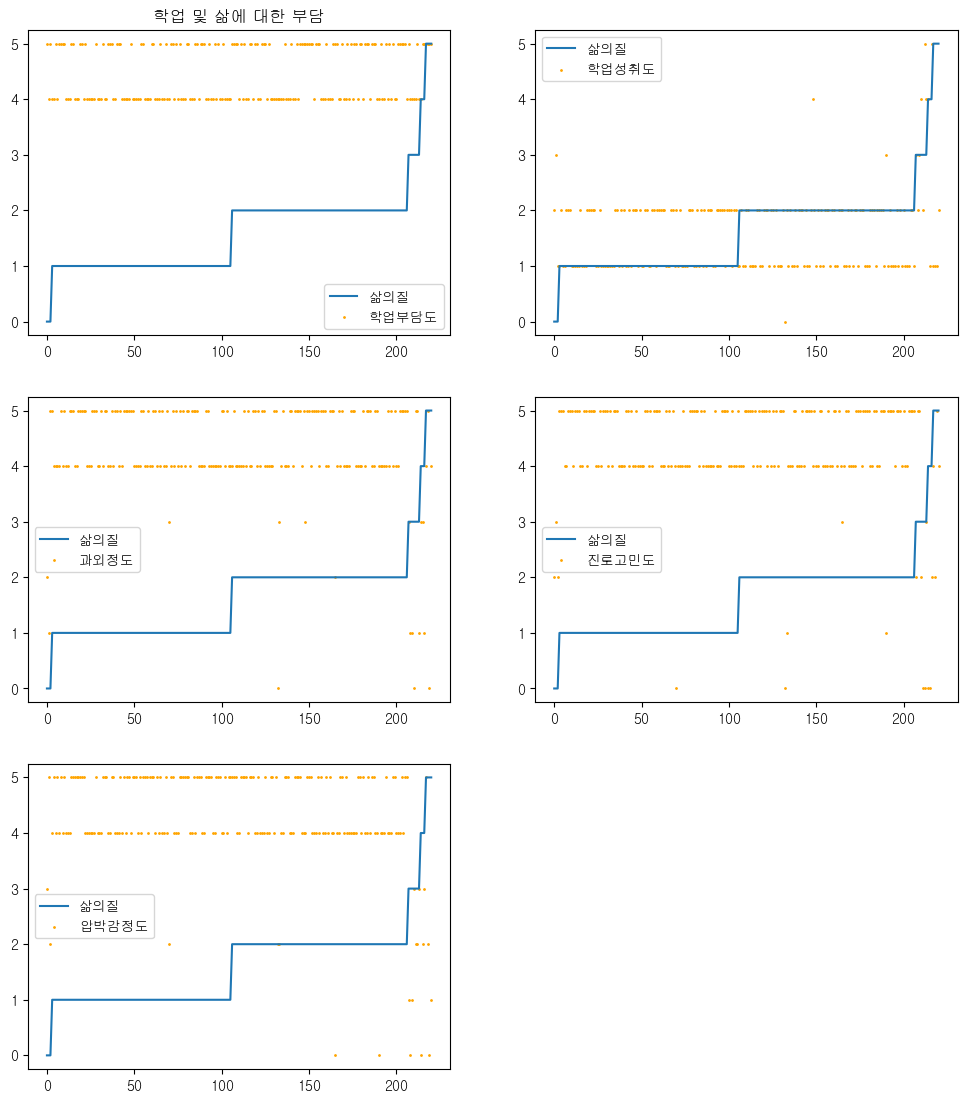

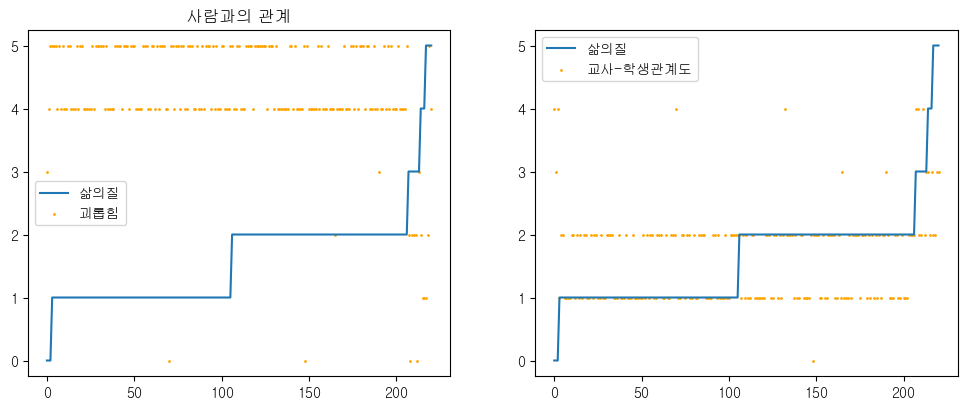

In [15]:
plotData = stressData.loc[(2 == stressData['스트레스']) & (4 <= stressData['학업부담도'])].sort_values('삶의질')
EdStress(plotData, '삶의질')
ReStress(plotData, '삶의질')

In [16]:
def DataLevelCount(colums, level, title):
    result = pd.DataFrame(stressData)
    cols = result.columns
    corr = result.corr()['스트레스']
    i = 0
    while i < len(cols):
        if cols[i] == '스트레스':
            break
        elif corr.iloc[i] > 0:
            result[cols[i]] = pd.Series(result.loc[:, cols[i]] >= result.loc[:, cols[i]].max() * level)
        else:
            result[cols[i]] = pd.Series(result.loc[:, cols[i]] <= result.loc[:, cols[i]].max() * (1 - level))
        i += 1
    
    result = pd.DataFrame([result.iloc[:, 0:len(colums)-1].sum(axis = 1), result['스트레스']], index = ['count', '스트레스']).T.sort_values('스트레스')
    result
    plt.plot(range(0, len(result)), result['스트레스'], label = '스트레스')
    plt.scatter(range(0, len(result)), result['count'], label = 'count', s = 2, c = "orange")
    plt.legend()
    plt.title(title)
    plt.show()
    print(f"상관계수 : {result.corr().loc['count', '스트레스']}")

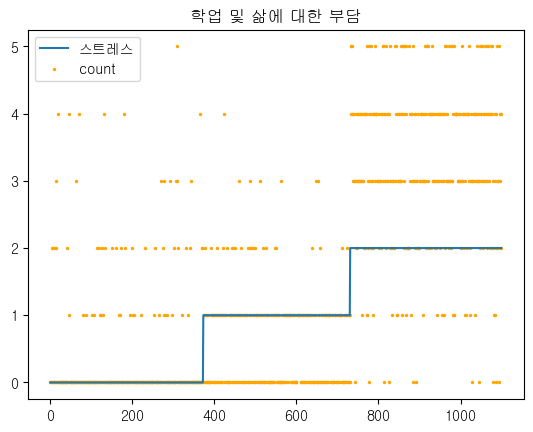

상관계수 : 0.7413513251384211


In [17]:
DataLevelCount(['학업부담도', '학업성취도', '과외정도', '진로고민도', '압박감정도', '스트레스'], 0.75, "학업 및 삶에 대한 부담")

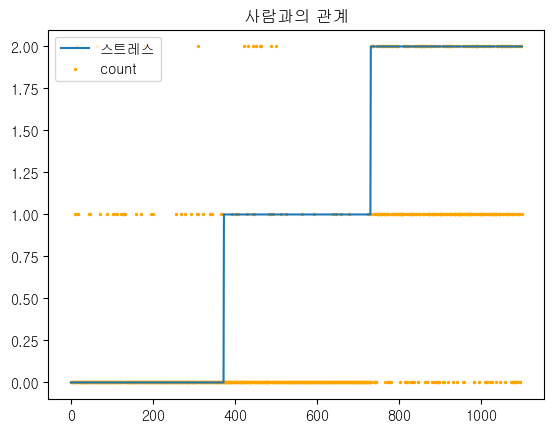

상관계수 : 0.6247190098083187


In [18]:
DataLevelCount(['괴롭힘', '교사-학생관계도', '스트레스'], 0.75, "사람과의 관계")

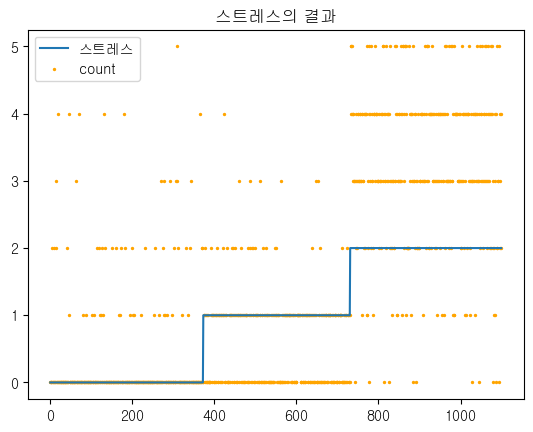

상관계수 : 0.7413513251384211


In [19]:
DataLevelCount(['불안수준', '우울증', '두통', '수면질', '삶의질', '스트레스'], 0.75, "스트레스의 결과")

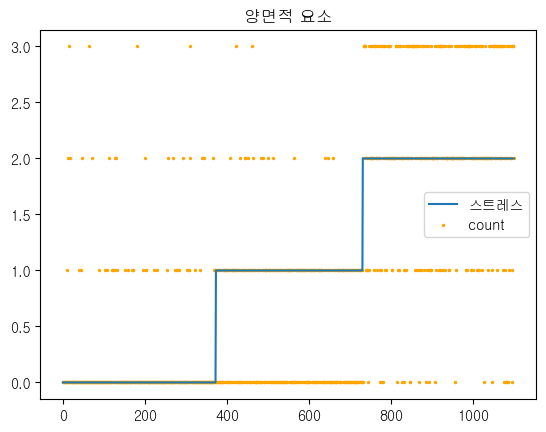

상관계수 : 0.7241586221336668


In [20]:
DataLevelCount(['자존감', '정신과병력', '사회적지원', '스트레스'], 0.75, "양면적 요소")

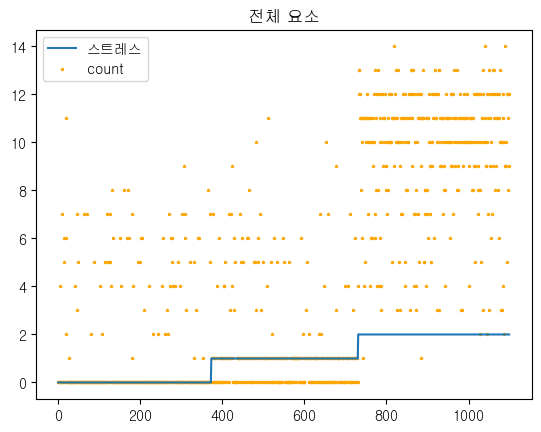

상관계수 : 0.7654946860816393


In [21]:
DataLevelCount(stressData.columns, 0.75, "전체 요소")